# U_mass and C_v

In [ ]:
import pyLDAvis.gensim
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
data1 = pd.read_csv("../data/news_data/data_1.csv", encoding="gbk")
data2 = pd.read_csv("../data/news_data/data_2.csv", encoding="gbk")
data3 = pd.read_csv("../data/news_data/data_3.csv", encoding="gbk")
data4 = pd.read_csv("../data/news_data/data_4.csv", encoding="gbk")

all_data = pd.concat([data1, data2], ignore_index=True)
all_data = pd.concat([all_data, data3], ignore_index=True)
all_data = pd.concat([all_data, data4], ignore_index=True)

all_data["content"] = all_data.apply(lambda x: x["content"].strip().split(" "), axis=1)
texts = all_data["content"].to_list()
print("get all data")

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
candi=[]
u_mass=[]
c_v=[]
for i in range(2,21):
    ldamodel=gensim.models.ldamodel.LdaModel.load("../model/lda_model_topicnums/lda_"+str(i)+".model")
    cm = CoherenceModel(model=ldamodel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    cm2 = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
    candi.append(i)
    u_mass.append(cm.get_coherence())
    c_v.append(cm2.get_coherence())
    print('u_mass('+str(i)+'):'+str(cm.get_coherence()))
    print('c_v('+str(i)+'):'+str(cm2.get_coherence()))

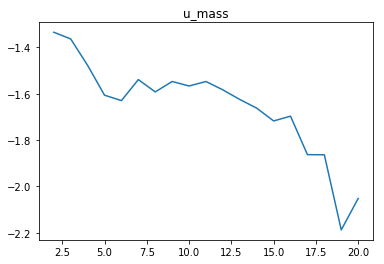

In [5]:
import matplotlib.pyplot as plt
plt.title('u_mass')
plt.plot(candi, u_mass)
plt.show()

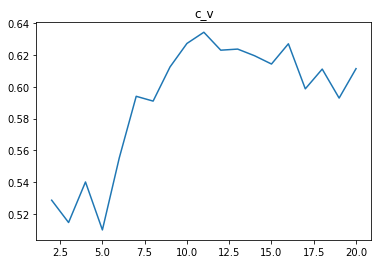

In [4]:
plt.title('c_v')
plt.plot(candi, c_v,label='c_v')
plt.show()

# pyLDAvis (the output can only shows in Google chrome browser)

In [1]:
import pyLDAvis.gensim
import time
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import gensim
import pandas as pd
data1 = pd.read_csv("../data/news_data/data_1.csv", encoding="gbk")
data2 = pd.read_csv("../data/news_data/data_2.csv", encoding="gbk")
data3 = pd.read_csv("../data/news_data/data_3.csv", encoding="gbk")
data4 = pd.read_csv("../data/news_data/data_4.csv", encoding="gbk")

all_data = pd.concat([data1, data2], ignore_index=True)
all_data = pd.concat([all_data, data3], ignore_index=True)
all_data = pd.concat([all_data, data4], ignore_index=True)

all_data["content"] = all_data.apply(lambda x: x["content"].strip().split(" "), axis=1)
texts = all_data["content"].to_list()
print("get all data")

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
ldamodel=gensim.models.ldamodel.LdaModel.load(r'../model/lda_model_topicnums/lda_7.model')
print(ldamodel.show_topics())
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/anaconda/envs/py35/lib/python3.5/site-packages/_pytest/mark/structures.py:431: DeprecationWarning: The usage of `cmp` is deprecated and will be removed on or after 2021-06-01.  Please use `eq` and `order` instead.
  @attr.s(cmp=False, hash=False)
/anaconda/envs/py35/lib/python3.5/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


get all data
[(0, '0.024*"病例" + 0.020*"肺炎" + 0.019*"医院" + 0.019*"新冠" + 0.018*"疫情" + 0.018*"确诊" + 0.016*"患者" + 0.011*"武汉" + 0.010*"医疗" + 0.009*"累计"'), (1, '0.008*"脱贫" + 0.008*"扶贫" + 0.008*"学生" + 0.008*"就业" + 0.007*"产业" + 0.007*"村民" + 0.006*"种植" + 0.006*"发展" + 0.006*"农业" + 0.006*"学校"'), (2, '0.024*"中国" + 0.014*"疫情" + 0.012*"美国" + 0.009*"新冠" + 0.008*"全球" + 0.008*"国家" + 0.007*"国际" + 0.005*"报道" + 0.005*"世界" + 0.005*"肺炎"'), (3, '0.025*"疫情" + 0.018*"复工" + 0.015*"企业" + 0.014*"防控" + 0.011*"人员" + 0.009*"服务" + 0.009*"生产" + 0.009*"复产" + 0.008*"工作" + 0.008*"口罩"'), (4, '0.019*"企业" + 0.010*"发展" + 0.008*"项目" + 0.007*"市场" + 0.007*"经济" + 0.007*"疫情" + 0.007*"公司" + 0.007*"亿元" + 0.005*"政策" + 0.005*"投资"'), (5, '0.007*"武汉" + 0.005*"工作" + 0.004*"队员" + 0.004*"孩子" + 0.003*"一线" + 0.003*"志愿者" + 0.003*"生活" + 0.003*"希望" + 0.003*"湖北" + 0.002*"小时"'), (6, '0.027*"工作" + 0.020*"疫情" + 0.020*"防控" + 0.008*"落实" + 0.008*"整改" + 0.007*"责任" + 0.006*"监督" + 0.006*"干部" + 0.006*"推进" + 0.006*"发展"')]


/anaconda/envs/py35/lib/python3.5/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
